This is a toy example of the use of ClusterGraph. We will start by constructing a collection of points sampled from a unit circle.

In [1]:
import numpy as np
import pandas as pd
import networkx as nx

from matplotlib import pyplot as plt
from matplotlib import colormaps as cm

## Generate data

In [2]:
X = np.array([[np.cos(x), np.sin(x)] for x in np.arange(0, 6.3, 0.1)])
points_df = pd.DataFrame(X, columns=["x", "y"])

points_df["angle"] = np.arange(0, 6.3, 0.1)

points_df.head()

,x,y,angle
0,1.000000,0.000000,0.0
1,0.995004,0.099833,0.1
2,0.980067,0.198669,0.2
3,0.955336,0.295520,0.3
4,0.921061,0.389418,0.4


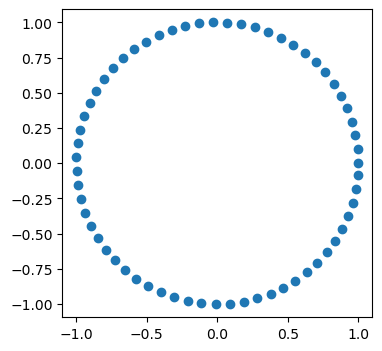

In [3]:
plt.figure(figsize=(4, 4))
plt.scatter(points_df.x, points_df.y)
plt.axis("equal")
plt.show()

## Cluster points

In [4]:
from sklearn.cluster import KMeans

model_KM = KMeans(10, random_state=42)
pred = model_KM.fit_predict(X)

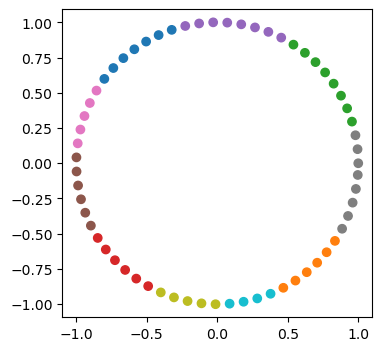

In [5]:
plt.figure(figsize=(4, 4))
plt.scatter(points_df.x, points_df.y, c=pred, cmap="tab10")
plt.axis("equal")
plt.show()

## Create ClusterGraph

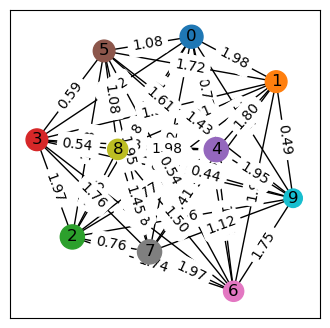

In [6]:
import clustergraph.clustergraph as cg
from clustergraph.utils import get_clusters_from_scikit
from clustergraph.plot_graph import draw_graph

cluster_g = cg.ClusterGraph(
    clusters=get_clusters_from_scikit(pred), X=X, metric_clusters="average"
)
# Coloring the graph
cluster_g.color_graph(
    node_color_labels=pred,
    node_palette=cm.get_cmap("tab10"),
)

fig, ax = plt.subplots(figsize=(4, 4))
draw_graph(cluster_g.Graph, ax=ax)

## Metric distortion pruning

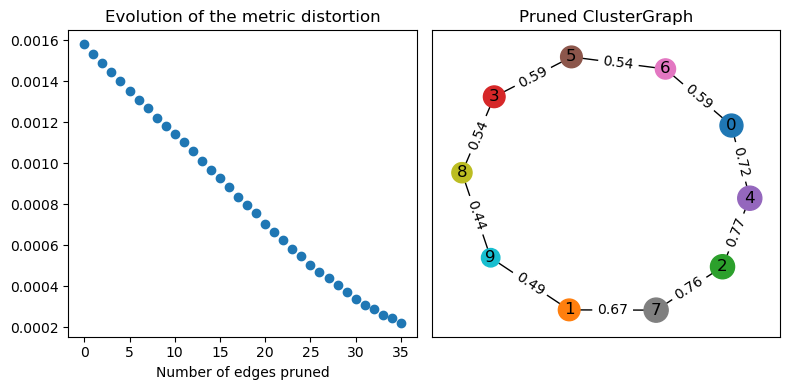

In [7]:
# Distortion pruning
metric_distortion_graph, md = cluster_g.prune_distortion(knn_g=5, score=True)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4))

ax1.scatter(range(len(md)), md)
ax1.set_title("Evolution of the metric distortion")
ax1.set_xlabel("Number of edges pruned")

ax2.set_title("Pruned ClusterGraph")
metric_distortion_graph = cluster_g.prune_distortion()
draw_graph(metric_distortion_graph, ax=ax2)

plt.tight_layout()